In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Tree Method contours =  539
External Method contours =  18
List Method contours =  539
Connected Component contours =  539


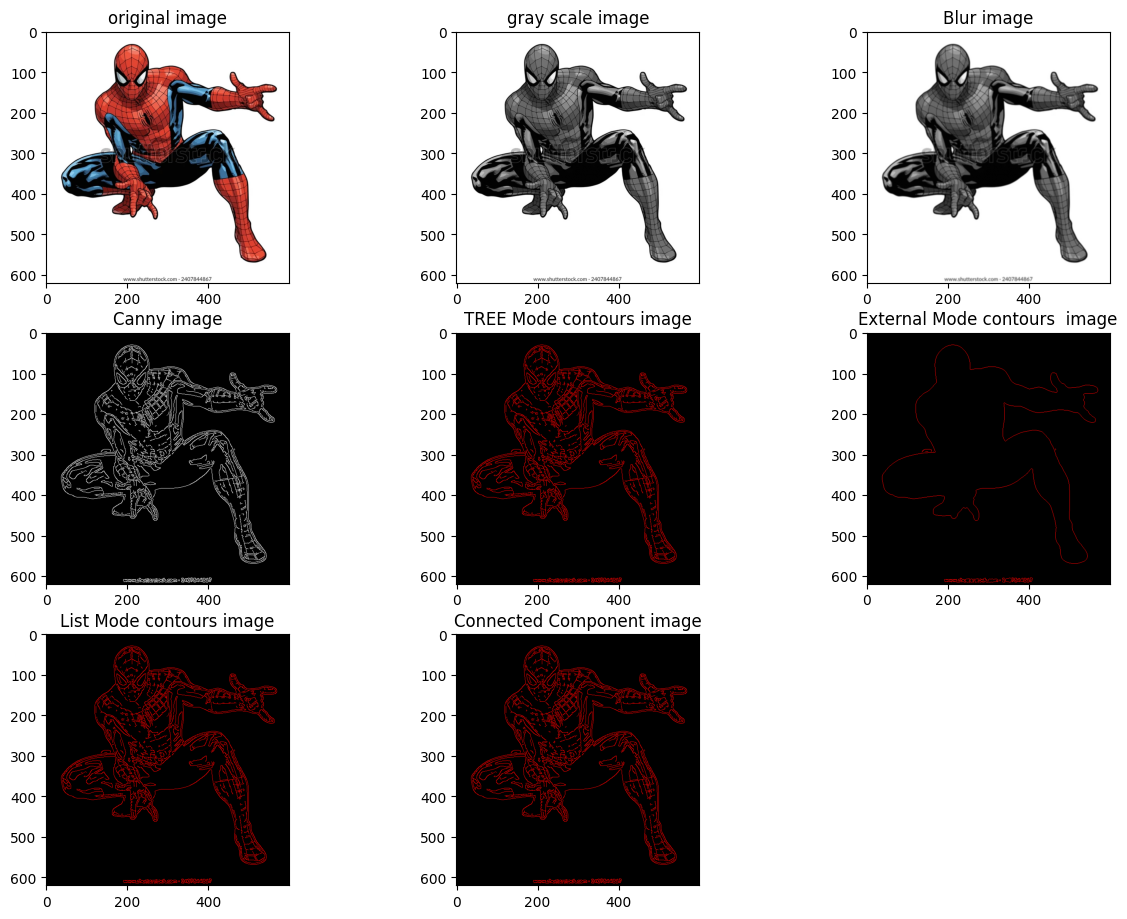

In [13]:
img = cv2.imread("images/spiderman.png")
cv2.imshow("img",img)

blank = np.zeros(img.shape, dtype="uint8")
blank1 = blank.copy()
blank2 = blank.copy()
blank3 = blank.copy()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", gray_img)

blur = cv2.GaussianBlur(gray_img, (3,3), cv2.BORDER_DEFAULT)
cv2.imshow("blur", blur)

canny = cv2.Canny(blur, 125, 175)
cv2.imshow("canny", canny)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f"Tree Method contours = ",len(contours))
cv2.drawContours(blank, contours, -1, (0,0,255), 1)
cv2.imshow("TREE Mode", blank)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"External Method contours = ",len(contours))
cv2.drawContours(blank1, contours, -1, (0,0,255), 1)
cv2.imshow("External Mode", blank1)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"List Method contours = ",len(contours))
cv2.drawContours(blank2, contours, -1, (0,0,255), 1)
cv2.imshow("list Mode", blank2)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(f"Connected Component contours = ",len(contours))
cv2.drawContours(blank3, contours, -1, (0,0,255), 1)
cv2.imshow("Connected Component Mode", blank3)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15,15))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(4,3,1);plt.title("original image");plt.imshow(img)
plt.subplot(4,3,2);plt.title("gray scale image");plt.imshow(gray_img, cmap = "gray")
plt.subplot(4,3,3);plt.title("Blur image");plt.imshow(blur, cmap = "gray")
plt.subplot(4,3,4);plt.title("Canny image");plt.imshow(canny, cmap = "gray")
plt.subplot(4,3,5);plt.title("TREE Mode contours image");plt.imshow(blank[:,:,::-1])
plt.subplot(4,3,6);plt.title("External Mode contours  image");plt.imshow(blank1[:,:,::-1])
plt.subplot(4,3,7);plt.title("List Mode contours image");plt.imshow(blank2[:,:,::-1])
plt.subplot(4,3,8);plt.title("Connected Component image");plt.imshow(blank3[:,:,::-1])




# Contour Manipulation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
img = cv2.imread("images/spiderman.png")
cv2.imshow("img",img)

blank = np.zeros(img.shape, dtype="uint8")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", gray_img)

blur = cv2.GaussianBlur(gray_img, (3,3), cv2.BORDER_DEFAULT)
cv2.imshow("blur", blur)

canny = cv2.Canny(blur, 125, 175)
cv2.imshow("canny", canny)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(f" Connected Component Method contours = ",len(contours))
cv2.drawContours(img, contours, -1, (0,255,0), 1)
cv2.imshow("Connected Component Mode", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

 Connected Component Method contours =  539


# Extracting the Largest Contour in the Image

To extract the largest contour in an image, the function cv2.contourArea alonf with the max(iterable, key=function) can be used. Here the max function takes the iterable which here is the contours variable which contains the list of the contours, the main part of this max function is the key=function where the cv2.contourArea function is specified. Combinedly the max function basically means that it is passing each contour from the contours variable individually to the cv2.contourArea function to calculate the area of each contour and finally provide the contour that has max area.<br>
The syntax for this is:<br>
biggest_contour(new variable)=max(contours(iterable), key=(function)cv2.contourArea)<br>
We can also calculate the area of the biggest_contour by using:<br>
area = cv2.contourArea(biggest_contour)<br>
and printing the area.

1) What is the purpose or importance of extracting the largest contour in an image?<br>
During image preprocessing, a process called mophological operations(errosion and dillation) which helps in removing noise in an image, but often even though this step is carried out some noise retain in the image or objects that are not considered as noise but ar not big enough.<br>
So when extracting the largest contour in an image we can discard this noise or the unwanted object.


In [3]:
img = cv2.imread("images/spiderman.png")
biggest_contour = max(contours, key = cv2.contourArea)
cv2.drawContours(img, biggest_contour, -1, (0,255,0), 4)
cv2.imshow("Biggest Contour", img)
area = cv2.contourArea(biggest_contour)
print(area)

cv2.waitKey(0)
cv2.destroyAllWindows()

116781.5


# Sorting Contours in terms of their Size

Insted of the max function, the sorted function  is used along with the reverse=True to change the order of the contours in descending order

In [4]:
image = cv2.imread("images/spiderman.png")
sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)

# draw largest 3 contours
for i, cont in enumerate(sorted_contours[:4],1):
    cv2.drawContours(img, cont, -1, (0,255,0),3)
    cv2.putText(img,str(i), (cont[0,0,0],cont[0,0,1]-10),cv2.FONT_HERSHEY_SIMPLEX,1.4,(0,255,0),4)

cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing a Bounding Rectangle around a Contour

1) Straight Bounding Rectangle<br>
syntax: <br>
x, y, w, h = cv2.boundingRect(array)<br>
returns:<br>
x -> top left x coordinate<br>
y -> top left y coordinate<br>
w-> width of rectangle<br>
h -> height of the rectangle<br>
only a single contour can be passed in this function.<br>
Using this method, the bounding box can over lay another contour<br>
the image can be cropped out as the bounding box is a square

In [5]:
img = cv2.imread("images/spiderman.png")
# x, y, w, h = cv2.boundingRect(biggest_contour)
# x, y, w, h = cv2.boundingRect(contours[350])
x, y, w, h = cv2.boundingRect(sorted_contours[3])

cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0),3)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2) Rotated Rectangle<br>
syntax: <br>
retval = cv2.minAreaRect(points)<br>
returns:<br>
x -> top left x coordinate<br>
y -> top left y coordinate<br>
w-> width of rectangle<br>
h -> height of the rectangle<br>
angle of the rotation of the bounding box<br>
The bounding box created by this function covers the minimum possible area.<br>
the image cannob be cropped out as the bounding box is not a square.

In [7]:
img = cv2.imread("images/spiderman.png")
# x, y, w, h = cv2.boundingRect(biggest_contour)
# x, y, w, h = cv2.boundingRect(contours[350])
retval= cv2.minAreaRect(sorted_contours[3])

box = cv2.boxPoints(retval).astype("int")
cv2.drawContours(img, [box], 0, (0,255,0),3)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

3) Convex Hull<br>
syntax: <br>
hull=cv2.convexHull(points,hull,clockwise,returnPoints)<br>
It is the smallest, tightest boundry we can create that encloses the entire shape.<br>



In [12]:
img = cv2.imread("images/spiderman.png")
hull = cv2.convexHull(sorted_contours[1])
cv2.drawContours(img, [hull], -1, (0,255,0),3)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
img = cv2.imread("images/spiderman.png")
hull = cv2.convexHull(sorted_contours[5])
cv2.drawContours(img, [hull], -1, (0,255,0),3)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()